1. Load csv correctly into a DataFrame and show contents in a cell

In [1]:
import pandas
df = pandas.read_csv('online_shoppers_intention_cs4364.csv')
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [2]:
for c in df.columns:
	print(c)
	print(df[c].value_counts(dropna=False))
print(df.columns)

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64
Informational_Duration
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1

2. Holdout dataset split as specified (10000 - 12331 for holdout)

I will perform this split after I change categorical columns into numeric

holdout = df[10000:12332]
train = df[0:10000]


3. Correct explanation generalization from such a holdout split

The Rows 10000 - 12331 all contain browsing history that took place in either November or December.  These are probably the most popular months for online shopping, as these 2 months have Black Friday, Cyber Monday, and holidays such as Chanukah and Christmas.  This means that this particular holdout set will probably have some skewed values in comparison to other months since online shoppers are more likely to actually purchase things rather than just browse, and are also probably more likely to spend more time on these e-commerce websites.  Therefore, this holdout set has a strong bias and makes the split not very generalizable of the dataset as a whole.

4. Use value_counts() in pandas to print out the distributions of the categorical and ordinal numbered features (treat SpecialDay as categorical here). Turn on the setting to reveal missing data -- how many features, and what percent of them, were missing? Discuss in markdown in your notebook.

In [4]:
#Categorical
categorical = df[['SpecialDay','Month','VisitorType', 'OperatingSystems','Browser','Region','TrafficType','Weekend', 'Revenue']]
for value in categorical:
    print(categorical[value].value_counts(ascending = True,dropna=False))


1.0      154
0.2      178
0.4      243
0.8      325
0.6      351
0.0    11079
Name: SpecialDay, dtype: int64
Feb      184
June     288
Jul      432
Aug      433
Sep      448
Oct      549
Dec     1727
Mar     1907
Nov     2998
May     3364
Name: Month, dtype: int64
Other                   85
New_Visitor           1694
Returning_Visitor    10551
Name: VisitorType, dtype: int64
5       6
7       7
6      19
8      79
4     478
3    2555
1    2585
2    6601
Name: OperatingSystems, dtype: int64
9        1
11       6
12      10
7       49
13      61
3      105
8      135
10     163
6      174
5      467
4      736
1     2462
2     7961
Name: Browser, dtype: int64
5     318
8     434
9     511
7     761
6     805
2    1136
4    1182
3    2403
1    4780
Name: Region, dtype: int64
17       1
12       1
16       3
18      10
14      13
19      17
15      38
7       40
9       42
20     198
11     247
5      260
8      343
6      444
10     450
13     738
4     1069
3     2052
1     2451
2     39

In [5]:
#Numeric
numeric = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']]
for value in numeric:
    #pandas.set_option('display.max_rows', df.shape[0]+1)
    print(numeric[value].value_counts(ascending = True,dropna=False))

26       1
27       1
20       2
21       2
23       3
22       4
24       4
19       6
18      12
17      16
16      24
15      38
14      44
13      56
12      86
11     105
10     153
9      225
8      287
7      338
6      432
5      575
4      765
3      915
2     1114
1     1354
0     5768
Name: Administrative, dtype: int64
29.440000        1
82.700000        1
94.233333        1
23.533333        1
216.400000       1
              ... 
11.000000       42
7.000000        45
5.000000        53
4.000000        56
0.000000      5903
Name: Administrative_Duration, Length: 3335, dtype: int64
13       1
11       1
16       1
24       1
14       2
12       5
10       7
8       14
9       15
7       36
6       78
5       99
4      222
3      380
2      728
1     1041
0     9699
Name: Informational, dtype: int64
91.20        1
130.76       1
79.70        1
61.60        1
38.90        1
          ... 
6.00        26
10.00       26
7.00        26
9.00        33
0.00      9925
Name: Informati

The only feature with missing data is ProductRelated.  The value_counts() method reveals that there are 335 rows with missing data, 2.7%.

5. Use the describe() method in pandas to print out summary statistics. Discuss which features you will have to consider more carefully, based on these results.

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,11995.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,32.122134,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.898778,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Looking at the mean durations that the customers spent on the different types of web pages(administrative, informational, and product related), the mean time spent on product related pages is 1194.746220, which is significantly larger than 34.472398(informational) and 80.818611(administrative).  This means that customers put more emphasis on these types of pages, so we should probably consider them more carefully in out analysis of this data.



6. Handle any missing data in your training data, but do not simply delete the rows. In your notebook, discuss why you chose to handle the missing data that way.

In [7]:
import numpy as np

#Handle missing values where ProductRelated_Duration = 0
#get all the rows where product is null and related = 0
rows = df.loc[(df['ProductRelated_Duration']==0) & (~df['ProductRelated'].isna())]
mean = rows['ProductRelated'].mean()


#get all the rows where product is null and related != 0
newrows = df.loc[~(df['ProductRelated'].isna()) & (df['ProductRelated_Duration'] != 0)]
newmean = newrows['ProductRelated'].mean()
print(newmean)

#Assign all missing product related values where the duration is 0 the mean
df['ProductRelated'] = np.where(
    (df['ProductRelated'].isna()) & (df['ProductRelated_Duration'] == 0), mean, df['ProductRelated']
)
df['ProductRelated'] = np.where(
    (df['ProductRelated'].isna()) & (df['ProductRelated_Duration'] != 0), newmean, df['ProductRelated']
)


34.081227276758


There is a lot of data missing in the ProductRelated column.  If the ProductRelated_Duration column has a value of 0, I noticed that the ProductRelated values range around 0-4, so I decided to find the mean of all of the rows where the ProcuctRelated column was not NaN and the duration was 0.  Then I assigned all the NaN values with a ProductRelated_Duration of 0 with the mean ProductRelated value of those rows.  I then did the same thing for the ones where duration was > 0.

In [8]:
#Making months into ints
df['Month'].replace(['Feb', 'Mar', 'Apr', 'May', 'June','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],[2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df['VisitorType'].replace(['Returning_Visitor', 'New_Visitor', 'Other'],[0,1,2], inplace=True)
df['Weekend'].replace(['True', 'False'],[0,1], inplace=True)


7. The holdout dataset also contains missing data. Discuss and implement how you recovered those items, without deleting those rows.

I performed the operations to fill in missing data for both the holdout and the training sets, since I did the logic on the whole dataframe before splitting into train and holdout sets.

In [10]:
#Here is where I perform the split into train and holdout, after dealing with missing data
holdout = df[10000:12332]
train = df[0:10000]
print(train.head())
print(holdout.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2

8. Discuss (and implement if applicable) whether or not you need to scale/normalize your features, and which ones, if any.

Looking at the colums for the pages and their corresponding durations, I don't think they would require any scaling or normalization.  It seems that the durations are all measured in the same unit, seconds.  For the features that count things like number of pages visited (Administrative, Informational, ProductRelated), these would also have no need to be scaled.  Anything with a categorical answer would not need to be scaled since the number values simply represent different answer choices.

9. There are several categorical features. Discuss and implement if you will encode them as ordinal numbers, or one-hot encode them, and why you chose to do so for each such feature.

In [11]:
#One hot encoding OperatingSystems, Browser, and Region
os_dummies = pandas.get_dummies(train.OperatingSystems, prefix = "os")
train = pandas.concat([train, os_dummies], axis=1)

browser_dummies = pandas.get_dummies(train.Browser, prefix = "browser")
train = pandas.concat([train, browser_dummies], axis=1)

region_dummies = pandas.get_dummies(train.Region, prefix = "region")
train = pandas.concat([train, region_dummies], axis=1)



For month, I will use encode them as ordinal values since months are already ordered 1 - 12.  I used one-hot encoding for OperatingSystems, Browser, and Region since there are no order to them and the values are just different types.

10. You don't need to implement this, but in the dataset, were there any ordinal features that they authors should have recorded as categorical, in your opinion? Why or why not? Discuss in a markdown cell.

I think that there should have been another column to go along with SpecialDay that listed the name of the holiday, becuase some holidays involve a lot more shopping than other days.  For example, they use the example or Valentines Day, but I would argue that Christmas is a more impactful time of year for online shopping.  I also think that the PageValue feature is a bit confusing in its description.  I wonder what type of metric is used to just assign a web page a value.  Does value mean how well it was organized? how much traffic it receives?  I think if I knew more about what it was measuring it could have been something catetegorical.

11. Use a heatmap to show the correlation between all feature pairs. Discuss, if any, which features you would recommend dropping from your model. Also discuss why you would want to drop them (what is the expected benefit?)

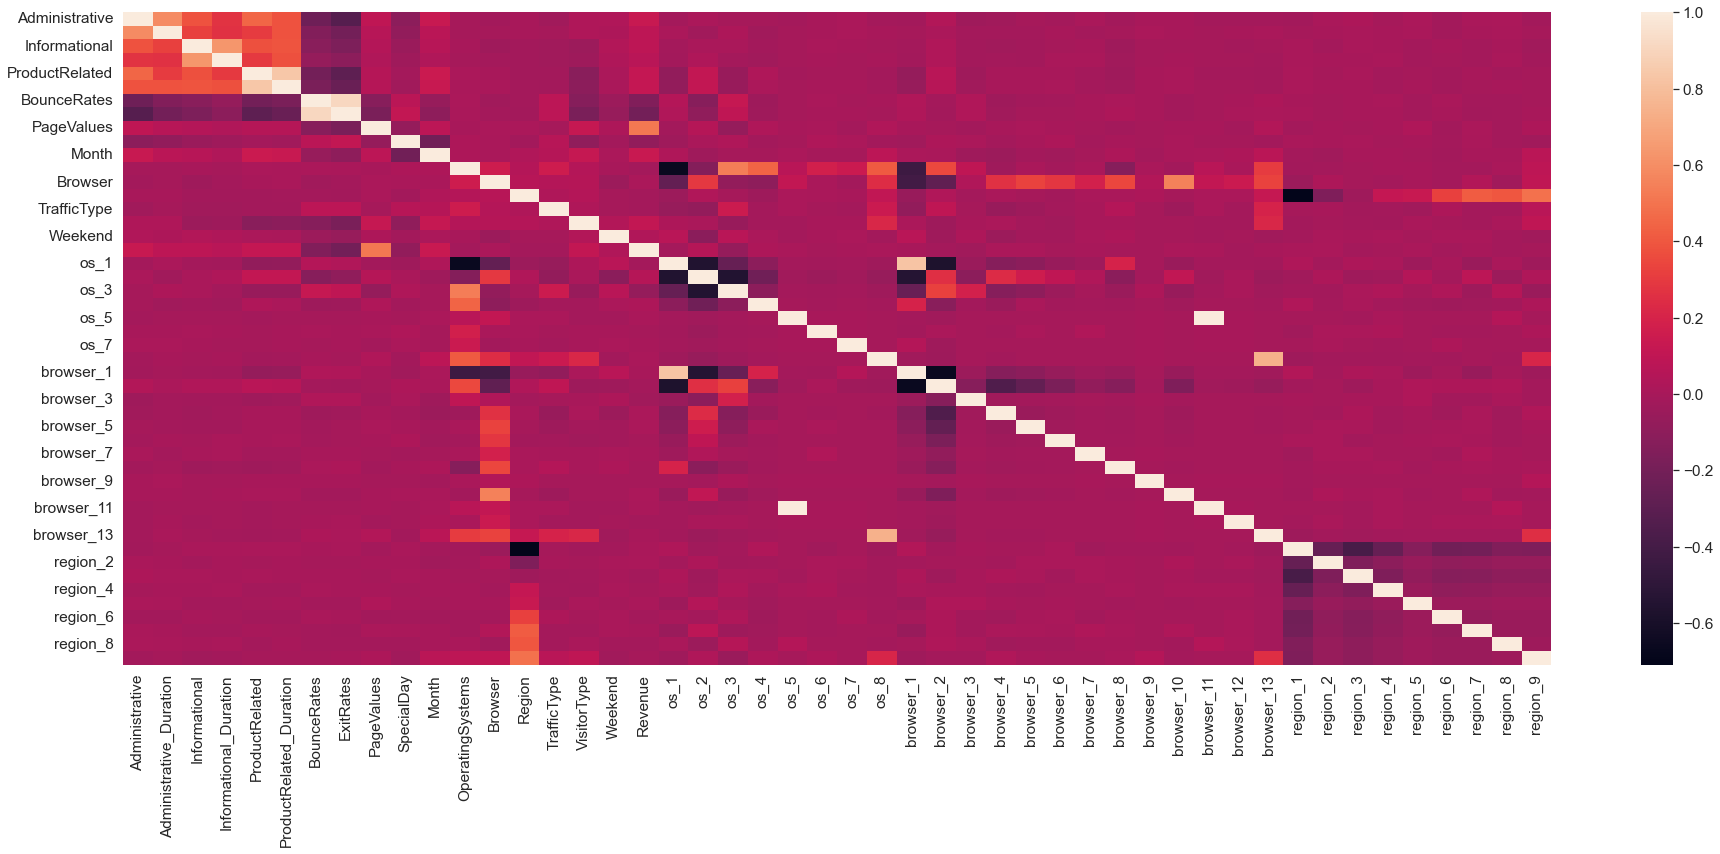

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#df.corr()
plt.figure(figsize=(32, 12))
sns.set(font_scale=1.4)
sns.heatmap(train.corr());

It seems that BounceRates and ExitRate are the most related, so it would make sense to drop one of them so that it doesnt overfit the model.  It isn't good to provide a decision tree/random forrest with too many features, especially ones with almost the same data.  If features are highly correlated, you can drop one of them.  I think that it would be best to drop ExitRate and keep BounceRate since in my opinion, BounceRate is more telling of whether or not a person found a page to be useful to them.

12. Given what you know about the limitations of RandomForests, engineer one additional feature, and discuss why you think it might help the model.	

In [13]:
conditions = ((train['SpecialDay'] > 0) , (train['SpecialDay'] == 0))
choices = (1,0)
train['isSpecialDay'] = np.select(conditions,choices)
train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,isSpecialDay
0,0,0.0000,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0000,0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0000,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0000,0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0,0.0000,0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0000,2,6.0,7.0,162.625000,0.000000,0.022222,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
9996,0,0.0000,0,0.0,12.0,442.500000,0.000000,0.008333,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
9997,0,0.0000,0,0.0,4.0,185.000000,0.050000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
9998,12,252.8125,4,78.5,100.0,4597.124242,0.009252,0.028497,2.638075,0.0,...,1,0,0,0,0,0,0,0,0,0


I think that we can make another feature that helps simplify the SpecialDay feature that is a binary classification of whether or not there is a special day coming up or no.  If the value of SpecialDay is over 0, than we can say yes, and if it is equal to 0, we can say no.  I think this can even replace the SpecialDay column because I think it matters more it the shopping date is near a special day, and not exactly how many days apart the day is from the holiday.  I can shop for a Christmas gift in the first week or 3rd week of Christmas, I'm not sure if it matters what day I bought it, as long as it was in the same timespan of the holiday.

13. Separate your training data into features and labels (X and y).

The labels for this dataset are highly imbalanced. Discuss and implement how you will handle this situation for this analysis.

I would say that the labels for the different durations are highly imbalanced for Administrative and Informational, as it seems most shoppers spend the majority of their time on the ProductRelated pages.  The majority of the durations for Administrative and Informational are 0.  I can handle the class imbalance here by upsampling, where I would take the durations that aren't 0 and then resample that class

In [14]:
#First, handle the imbalanced data before splitting

#https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample

# Separate majority and minority classes
admin_majority = train[train.Administrative_Duration==0]
admin_minority = train[train.Administrative_Duration!=0]

info_majority = train[train.Informational_Duration==0]
info_minority = train[train.Informational_Duration!=0]

# Upsample admin_minority class
df_minority_upsampled = resample(
    admin_minority, 
    replace=True,     # sample with replacement
    n_samples=5903,    # to match majority class
    random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pandas.concat([admin_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Administrative_Duration.value_counts()


# Upsample info_minority class
df_minority_upsampled2 = resample(
    info_minority, 
    replace=True,     # sample with replacement
    n_samples=9925,    # to match majority class
    random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled2 = pandas.concat([info_majority, df_minority_upsampled2])
# Display new class counts
df_upsampled2.Informational_Duration.value_counts()



0.000000      8086
9.000000       158
13.000000      111
12.000000      111
6.000000       110
              ... 
722.900000       1
23.533333        1
33.750000        1
30.266667        1
63.100000        1
Name: Informational_Duration, Length: 1038, dtype: int64

In [15]:
#Splitting training data
from sklearn.model_selection import train_test_split

target = 'Revenue'
y = train[target]
X = train.drop(labels = [target], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

14. Instantiate a RandomForest model of your choosing.	

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Instantiate Random Forrest
classifier_model = RandomForestClassifier()
#Fit it to the model
classifier_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predictions = classifier_model.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))

[False False False ...  True False False]
0.913


Define a grid to tune at least three different hyperparameters with at least two different values each. Discuss why you think these parameter values might be useful for this dataset.

In [17]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators' : [100, 200, 500], #num trees in forrest
    'max_features' : ['auto', 'sqrt', 'log2'], #num features to split at each leaf node
    'max_depth' : [4,5,6,7,8], #max levels in each tree
    'min_samples_leaf' : [1,2,4], #min num sampless required at each leaf node
    'min_samples_split': [10, 50, 100, 500,1000]
}



I think that it is importatnt to add n_estimators as a parameter in the grid search.  Since there are a lot of samples in this dataset, I thought it was useful to add parameter values of 100,200,500.  I also chose to include min_samples_split and I chose a range of value that go up to 1000.  I did this because there are so many rows, over 12000, so I think it might be useful to test it with a range of values in order to split at a node.

15. Set up a gridsearchCV with 5-fold cross validation. Discuss what accuracy metric you chose and why.	

In [18]:
#5 folds
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, scoring = 'accuracy',  cv = 5)


For the scoring parameter, I chose to set the metric of the grid search to accuracy becuase I thought it would do the best job at gerneralizing the data set and will identify correctly classified samples.

16. Train your model using gridsearchCV, and report the best performing hyperparameters.	

In [34]:
#Pass in training set
CV_rfc.fit(X_train, y_train)

best = CV_rfc.best_params_
print(best)

newPredictions = CV_rfc.predict(X_test)
print(accuracy_score(y_test, newPredictions))

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.8583690987124464


The best performing hyperparameters are: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
with an accuracy score of: 0.8583690987124464

17. Calculate accuracy, precision and recall on the holdout dataset. Discuss which metric you think is most meaningful for this dataset, and why

In [37]:
#Splitting holdout data
from sklearn.model_selection import train_test_split

target = 'Revenue'
y = holdout[target]
X = holdout.drop(labels = [target], axis='columns')
XH_train, XH_test, yh_train, yh_test = train_test_split(X, y, test_size=0.2)

#Pass in holdout set
CV_rfc.fit(XH_train, yh_train)

best = CV_rfc.best_params_
print(best)

Holdout_Predictions = CV_rfc.predict(XH_test)
print(accuracy_score(yh_test, Holdout_Predictions))



{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
0.8969957081545065


In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
#Holdout_Predictions = classifier_model.predict(holdout)
print('Precision: %.3f' % precision_score(yh_test, Holdout_Predictions))
print('Recall: %.3f' % recall_score(yh_test, Holdout_Predictions))
print('Accuracy: %.3f' % accuracy_score(yh_test, Holdout_Predictions))

Precision: 0.765
Recall: 0.681
Accuracy: 0.897


I think that in this model, where we are trying to preduct if an online purchase will be made based on browsing experience, recall is the best metric.  I think that companies and marketing agancies could make use of this study to try and predict customer spending habits, so a false negative would most likely be more damaging to their results.  This would be like the model predicting that a customer did not buy something even if they did, so they would be missing out on the data of the customer who really bought something from a specific brand/website.  

18. Discuss how the model performance on holdout compares to the model performance during training. Do you think your model will generalize well? Why or why not?

The model performs bettwe on the holdout compared to training.  The accuracy score of the holdout set is 0.897 while the accuracy score of the training data is 0.858.  I think the model performed bettwe on the holdout since it has been able, through the training process, to generalize the data, and I have put effort into tuning the data so that it can acheive this.

19. Generate a confusion matrix and discuss your results.

In [47]:
from sklearn.metrics import confusion_matrix
#predictions vs newPrediction
print(confusion_matrix(y_test,newPredictions))

[[350  24]
 [ 42  50]]


This confusion matrix shows that 50 of the results were correctly identified as a True and 350 of the results were correctlty identified as False.  24 results were predicted to be True although they were actually false, and 42 results were preducted to be false even though they were True.  The majority, though, of the results were correctly predicted.

20. Print out the feature importances of your model.

In [48]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = classifier_model.feature_importances_
for x,y in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(x,y))

Feature: 0, Score: 0.04294
Feature: 1, Score: 0.05667
Feature: 2, Score: 0.01773
Feature: 3, Score: 0.02510
Feature: 4, Score: 0.06487
Feature: 5, Score: 0.07459
Feature: 6, Score: 0.04901
Feature: 7, Score: 0.07866
Feature: 8, Score: 0.36545
Feature: 9, Score: 0.00433
Feature: 10, Score: 0.03992
Feature: 11, Score: 0.01027
Feature: 12, Score: 0.01157
Feature: 13, Score: 0.02089
Feature: 14, Score: 0.03050
Feature: 15, Score: 0.01279
Feature: 16, Score: 0.01032
Feature: 17, Score: 0.00426
Feature: 18, Score: 0.00652
Feature: 19, Score: 0.00519
Feature: 20, Score: 0.00234
Feature: 21, Score: 0.00004
Feature: 22, Score: 0.00034
Feature: 23, Score: 0.00023
Feature: 24, Score: 0.00040
Feature: 25, Score: 0.00403
Feature: 26, Score: 0.00642
Feature: 27, Score: 0.00025
Feature: 28, Score: 0.00376
Feature: 29, Score: 0.00288
Feature: 30, Score: 0.00135
Feature: 31, Score: 0.00068
Feature: 32, Score: 0.00070
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00132
Feature: 35, Score: 0.00008
Fe

21. Train and tune another decision-tree based model on your training dataset. Using the best performing hyperparameters, test this model on your holdout. How did it perform, compared to your earlier model? Do you think your results will generalize?

In [90]:
#Tuning Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("New Tree Acuracy Score: ",accuracy_score(y_test, predictions))

new_param_grid = {
    'max_features' : ['auto', 'sqrt', 'log2'], #num features to split at each leaf node
    'max_depth' : [4,5,6,7,8], #max levels in each tree
    'min_samples_leaf' : [1,2,4], #min num sampless required at each leaf node
    'min_samples_split': [10, 50, 100, 500,1000]
}
#5 folds
new_grid_search = GridSearchCV(estimator = clf, param_grid = new_param_grid, scoring = 'accuracy',  cv = 5)

#Pass in training set
new_grid_search.fit(X_train, y_train)

best_params = new_grid_search.best_params_
print(best_params)

newPredictions = new_grid_search.predict(X_test)
print("Accuracy Score on GS: ",accuracy_score(y_test, newPredictions))



New Tree Acuracy Score:  0.8025751072961373
{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 100}
Accuracy Score on GS:  0.8562231759656652


In [88]:
#Pass in holdout set with best parameters
clf = tree.DecisionTreeClassifier(
    max_depth = 7, 
    max_features = 'auto', 
    min_samples_leaf = 4,
    min_samples_split = 10
)
clf = clf.fit(XH_train, yh_train)
predictions = clf.predict(XH_test)
print("Holdout Acuracy Score: ",accuracy_score(yh_test, predictions))


Holdout Acuracy Score:  0.8648068669527897


After performing a Decision Tree Classifier on the holdout data, it seems that it bahaves pretty similarly to the earlier model, with results in the mid-high 80% range.  I thought that it would perform pretty well since we are specifically passing in the best possible parameters for tuning.

22. Next, repeat training and tuning on the same data with a LogisticRegression model. Do you need to do any additional feature cleaning or scaling here? Why or why not?

In [89]:
#https://datatofish.com/logistic-regression-python/
from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print("Acuracy Score: ",accuracy_score(y_test, y_pred))

y_H_pred = logistic_regression.predict(XH_test)
print("Holdout Acuracy Score: ",accuracy_score(yh_test, y_H_pred))



Acuracy Score:  0.8497854077253219
Holdout Acuracy Score:  0.8433476394849786


/Users/shainastein/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I still don't think that the model requires any feature cleaning or scaling.  I think the tuning that I applied to the training data earlier is sufficient, and there is nothing really to scale, since most of the data doesn't have any units, except for the durations, which I assume are in seconds.

Discuss the paper in one paragraph.

This project does a good overview of what it takes to properly handle a large dataset.  I had to fill in missing data, and I chose to do so by finding the avg value and filling them in.  I also had figure out which features to one hot encode to make the data more manageable and readable for the models.  Aside from this, I chose to add an additional feature for SpecialDay that identifies whether or not the shopping was done for a special day or not.  I had also changed the categorical answers into numerical values as well as dealing with class imbalances.  All of this preparation was done to improve the scores of the models that I implemented.  The first model I used was a RandomForestClassifier.  I trained the model on the training data and then by using grid search, I found the best hyperparameters to tune the model.  I then then passed the actual data, the holdout set, into the model to see if the model could generalize the data, and I think it did a fairly good job of doing so.  I also experimented with other types of models like DecisionTreeClassifier and Logistic Regression and they all got similar accuracy scores, which were in the mid 80s, so overall, I would say that the parameter tuning and feature engineering produced a pretty accurate model of the customer shopping habits.